In [1]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
%matplotlib inline

sys.version

C:\Users\okerinde\anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'3.5.5 |Anaconda custom (64-bit)| (default, Apr  7 2018, 04:52:34) [MSC v.1900 64 bit (AMD64)]'

In [2]:
df = pd.read_csv('C:/Users/okerinde/Documents/datasets/pgora/updated_100k_v2.csv')

In [3]:
df.head()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21,total_time_waiting_on_red_signal
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,49082
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660


In [4]:
df.describe()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_13,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21,total_time_waiting_on_red_signal
count,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,...,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000,105336.000000
mean,59.509493,59.613105,59.559173,59.543603,59.686109,59.613883,59.440742,59.491522,59.377003,59.438672,...,59.543167,59.274597,59.414483,59.446979,59.606592,59.438131,59.456064,59.474263,59.439536,48922.727216
std,34.750754,34.576932,34.592964,34.680237,34.696206,34.616714,34.615860,34.660048,34.614028,34.584374,...,34.676910,34.589940,34.654900,34.656950,34.539191,34.644679,34.588076,34.665599,34.593827,3248.635173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37838.000000
25%,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,30.000000,...,29.000000,29.000000,29.000000,29.000000,30.000000,29.000000,30.000000,29.000000,29.000000,46626.000000
50%,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,60.000000,59.000000,59.000000,59.000000,60.000000,48803.000000
75%,90.000000,90.000000,89.000000,90.000000,90.000000,90.000000,90.000000,90.000000,89.000000,89.000000,...,90.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,90.000000,89.000000,51107.000000
max,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,63292.000000


In [5]:
df['total_time_waiting_on_red_signal'].unique()

array([49082, 51223, 51461, ..., 42811, 43139, 42744], dtype=int64)

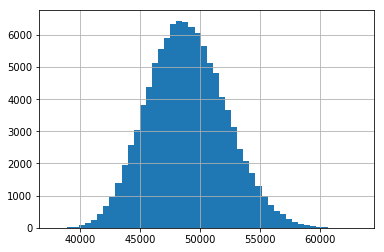

In [6]:
df['total_time_waiting_on_red_signal'].hist(bins=50)

In [7]:
def label_fix(label):
    if label <= 45000 or label >= 55000:
        return 0
    else:
        return 1

In [8]:
status = df['total_time_waiting_on_red_signal'].apply(label_fix)

In [9]:
status.head()

0    1
1    1
2    1
3    1
4    1
Name: total_time_waiting_on_red_signal, dtype: int64

In [10]:
df.apply(lambda x: sum(x.isnull()), axis=0) # number of missing values in each column

cross_road_1                        0
cross_road_2                        0
cross_road_3                        0
cross_road_4                        0
cross_road_5                        0
cross_road_6                        0
cross_road_7                        0
cross_road_8                        0
cross_road_9                        0
cross_road_10                       0
cross_road_11                       0
cross_road_12                       0
cross_road_13                       0
cross_road_14                       0
cross_road_15                       0
cross_road_16                       0
cross_road_17                       0
cross_road_18                       0
cross_road_19                       0
cross_road_20                       0
cross_road_21                       0
total_time_waiting_on_red_signal    0
dtype: int64

In [11]:
df.dtypes

cross_road_1                        int64
cross_road_2                        int64
cross_road_3                        int64
cross_road_4                        int64
cross_road_5                        int64
cross_road_6                        int64
cross_road_7                        int64
cross_road_8                        int64
cross_road_9                        int64
cross_road_10                       int64
cross_road_11                       int64
cross_road_12                       int64
cross_road_13                       int64
cross_road_14                       int64
cross_road_15                       int64
cross_road_16                       int64
cross_road_17                       int64
cross_road_18                       int64
cross_road_19                       int64
cross_road_20                       int64
cross_road_21                       int64
total_time_waiting_on_red_signal    int64
dtype: object

In [12]:
df['status'] = status # create a new column in the data frame for status

In [13]:
df.head()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21,total_time_waiting_on_red_signal,status
0,81,14,58,108,83,60,82,61,64,94,...,87,73,69,25,7,77,95,5,49082,1
1,81,92,16,44,95,64,110,98,95,105,...,5,40,105,118,48,40,62,45,51223,1
2,75,20,66,104,20,65,80,97,2,81,...,115,118,64,68,46,45,43,18,51461,1
3,30,42,65,108,67,81,85,32,83,48,...,79,44,90,6,25,46,102,62,45119,1
4,117,20,52,40,25,36,87,78,99,70,...,21,34,102,37,46,11,9,66,50660,1


In [15]:
df.to_csv('C:/Users/okerinde/Documents/datasets/pgora/100k_with_status.csv', index=False) # save new csv file to system

In [16]:
df.tail()

,cross_road_1,cross_road_2,cross_road_3,cross_road_4,cross_road_5,cross_road_6,cross_road_7,cross_road_8,cross_road_9,cross_road_10,...,cross_road_14,cross_road_15,cross_road_16,cross_road_17,cross_road_18,cross_road_19,cross_road_20,cross_road_21,total_time_waiting_on_red_signal,status
105331,108,20,53,44,24,60,75,104,96,53,...,69,46,114,41,93,72,9,64,56209,0
105332,119,18,75,39,61,40,101,100,17,118,...,71,11,84,14,67,14,28,44,57510,0
105333,9,55,51,53,21,3,90,34,15,69,...,46,10,38,30,89,76,68,113,52152,1
105334,27,21,8,105,83,14,86,44,29,53,...,60,58,37,55,57,107,87,62,46318,1
105335,112,91,33,20,58,35,3,5,42,103,...,108,77,75,5,85,18,6,28,45916,1


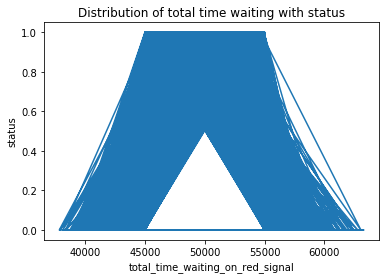

In [18]:
plt.xlabel('total_time_waiting_on_red_signal')
plt.ylabel('status')
plt.title('Distribution of total time waiting with status')
plt.plot(df['total_time_waiting_on_red_signal'], df['status'])

In [22]:
X = df.iloc[:,[0,20]].values  # cross roads
X

array([[ 81,   5],
       [ 81,  45],
       [ 75,  18],
       ...,
       [  9, 113],
       [ 27,  62],
       [112,  28]], dtype=int64)

In [24]:
y = df.iloc[:,22].values   # status column
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [29]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)